In [107]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df= pd.read_excel("/content/football_world_cups_results (1).xlsx")

In [109]:
print("*Column Names:*")
print(df.columns)
print("-----------------------------------------------------------------")
print("First 5 rows of the data")
print(df.head(5))
print("-----------------------------------------------------------------")
print("Null values ie one marked with NaN")
print(df.isnull().sum())
print("-----------------------------------------------------------------")


*Column Names:*
Index(['Year', 'Date', 'Time', 'Round', 'Stadium', 'City', 'Country',
       'HomeTeam', 'HomeGoals', 'AwayGoals', 'AwayTeam', 'Observation'],
      dtype='object')
-----------------------------------------------------------------
First 5 rows of the data
   Year       Date     Time    Round         Stadium         City  Country  \
0  1930 1930-07-13   15:00   Group 1         Pocitos  Montevideo   Uruguay   
1  1930 1930-07-13   15:00   Group 4  Parque Central  Montevideo   Uruguay   
2  1930 1930-07-14   12:45   Group 2  Parque Central  Montevideo   Uruguay   
3  1930 1930-07-14   14:50   Group 3         Pocitos  Montevideo   Uruguay   
4  1930 1930-07-15   16:00   Group 1  Parque Central  Montevideo   Uruguay   

     HomeTeam  HomeGoals  AwayGoals AwayTeam Observation  
0      France          4          1   Mexico              
1         USA          3          0  Belgium              
2  Yugoslavia          2          1   Brazil              
3     Romania          

In [110]:
print(df.isnull().sum().sum())

0


In [111]:
df.columns

Index(['Year', 'Date', 'Time', 'Round', 'Stadium', 'City', 'Country',
       'HomeTeam', 'HomeGoals', 'AwayGoals', 'AwayTeam', 'Observation'],
      dtype='object')

****Data Cleaning****

In [112]:
missingpercentage = df.isnull().mean() * 100

print("Missing Percentage per Column:")
print(missingpercentage.sort_values(ascending=False))


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


dropcols = missingpercentage[numeric_cols][missingpercentage[numeric_cols] > 30].index


print("\nColumns to drop (missing % > 30):")
print(dropcols.tolist())

# Drop
df.drop(columns=dropcols, inplace=True)

print("\nRemaining columns after drop:")
print(df.columns.tolist())


Missing Percentage per Column:
Year           0.0
Date           0.0
Time           0.0
Round          0.0
Stadium        0.0
City           0.0
Country        0.0
HomeTeam       0.0
HomeGoals      0.0
AwayGoals      0.0
AwayTeam       0.0
Observation    0.0
dtype: float64

Columns to drop (missing % > 30):
[]

Remaining columns after drop:
['Year', 'Date', 'Time', 'Round', 'Stadium', 'City', 'Country', 'HomeTeam', 'HomeGoals', 'AwayGoals', 'AwayTeam', 'Observation']


In [113]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)


Index(['Time', 'Round', 'Stadium', 'City', 'Country', 'HomeTeam', 'AwayTeam',
       'Observation'],
      dtype='object')


In [114]:

missing_cat_percentage = df[categorical_cols].isnull().mean() * 100
missing_cat_percentage = missing_cat_percentage[missing_cat_percentage > 0]

#Drop categorical columns with >30% missing
drop_cat_cols = missing_cat_percentage[missing_cat_percentage > 30].index
df.drop(columns=drop_cat_cols, inplace=True)


fill_cat_cols = missing_cat_percentage[missing_cat_percentage <= 30].index
for col in fill_cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


print("Dropped categorical columns with >30% missing:")
print(drop_cat_cols.tolist())

print("\nFilled categorical columns with <=30% missing using mode:")
print(fill_cat_cols.tolist())

Dropped categorical columns with >30% missing:
[]

Filled categorical columns with <=30% missing using mode:
[]


In [115]:
import matplotlib.pyplot as plt
import seaborn as sns


#visualizing outliers
for column in df.columns:
    if df[column].dtype in ['float64']:
        plt.figure(figsize=(5, 1))
        sns.boxplot(x=df[column])
        plt.show()


#coloumns with outliers
for column in df.columns:
    if df[column].dtype in ['float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        print("\n..........................................")

        if len(outliers) > 0:
            print(f"Outliers in '{column}':")
            print(f"Number of outliers in '{column}': {len(outliers)}")


****Exploratory Data Analysis****



In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set visual style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)


*Univariate Analysis*

In [117]:
df.columns

Index(['Year', 'Date', 'Time', 'Round', 'Stadium', 'City', 'Country',
       'HomeTeam', 'HomeGoals', 'AwayGoals', 'AwayTeam', 'Observation'],
      dtype='object')

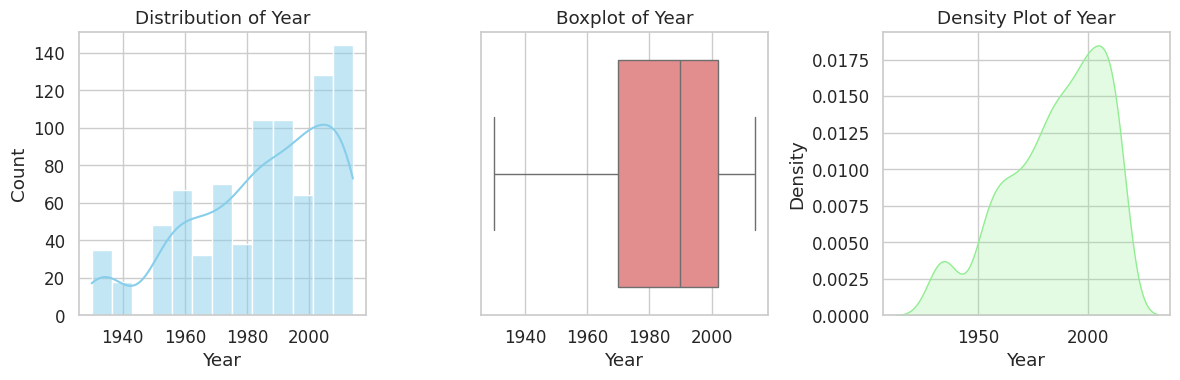

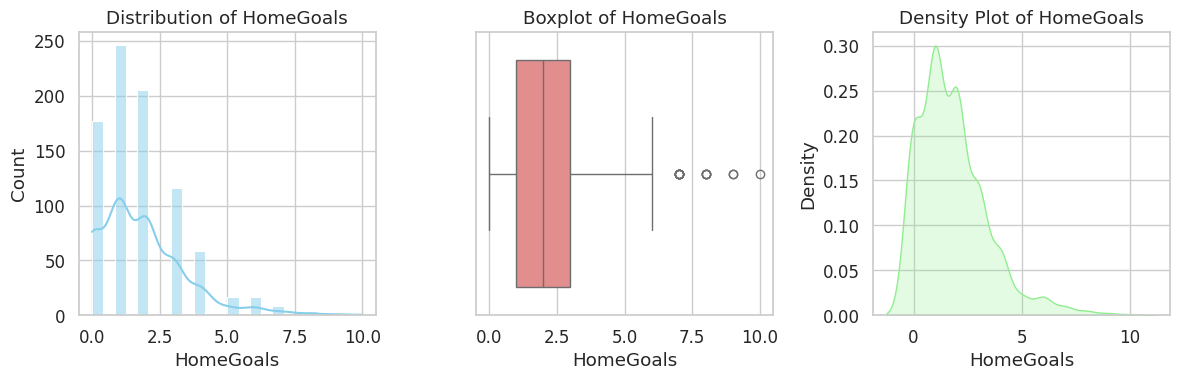

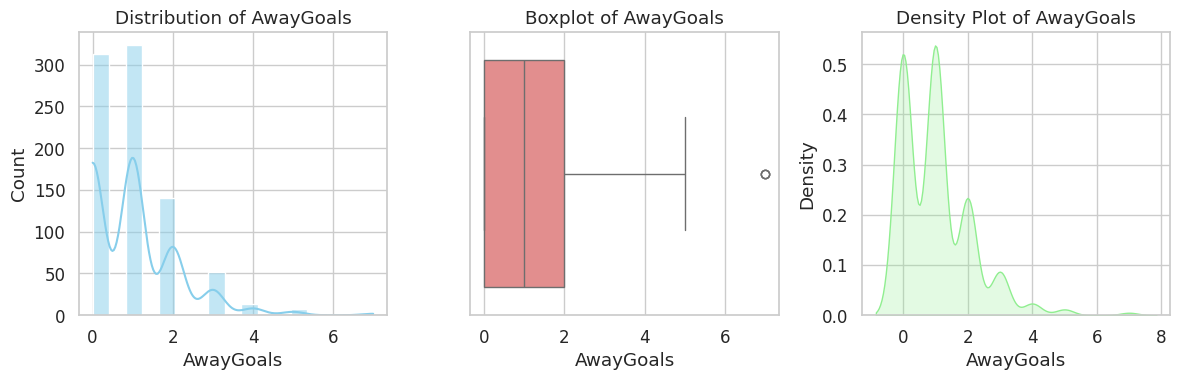

In [118]:


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


for col in numeric_cols:
    plt.figure(figsize=(12,4))

    # Histogram
    plt.subplot(1,3,1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1,3,2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')

    # Density Plot
    plt.subplot(1,3,3)
    sns.kdeplot(df[col], fill=True, color='lightgreen')
    plt.title(f'Density Plot of {col}')

    plt.tight_layout()
    plt.show()



In [120]:
df.columns

Index(['Year', 'Date', 'Time', 'Round', 'Stadium', 'City', 'Country',
       'HomeTeam', 'HomeGoals', 'AwayGoals', 'AwayTeam', 'Observation'],
      dtype='object')

Frequency of Matches by Country:
Country
Brazil          102
Germany         102
Mexico           84
France           82
Italy            69
South Africa     64
Korea/Japan      64
USA              52
Spain            52
Argentina        38
Sweden           35
Chile            32
England          32
Switzerland      26
Uruguay          18
Name: count, dtype: int64


/tmp/ipython-input-2661542302.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




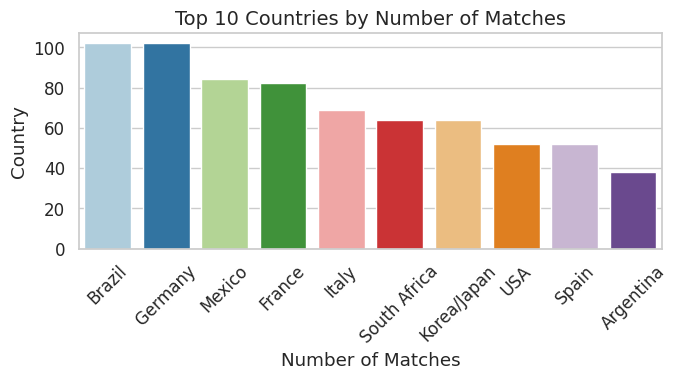

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Frequency table for Country
print("Frequency of Matches by Country:")
print(df['Country'].value_counts())

# Visualization — Top 10 Countries
plt.figure(figsize=(7,4))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index[:10],palette='Paired')
plt.title('Top 10 Countries by Number of Matches', fontsize=14)
plt.xlabel('Number of Matches')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2113015079.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




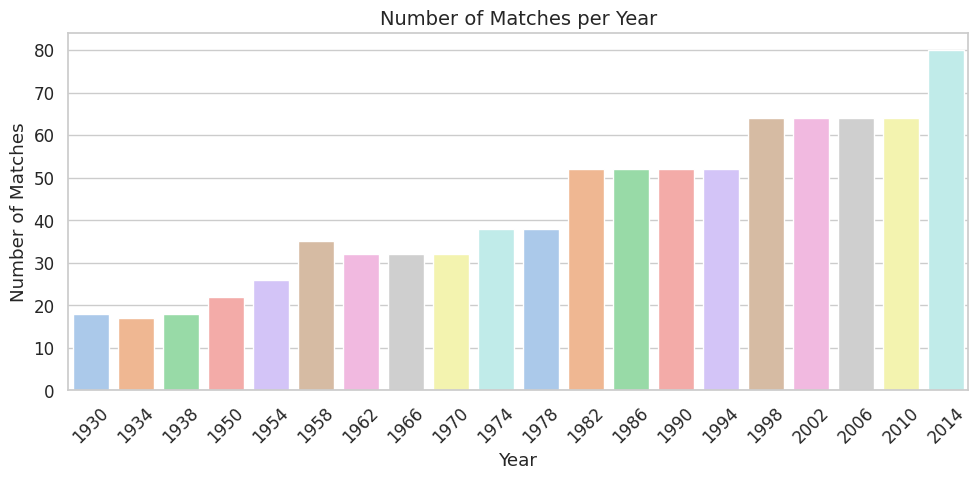

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization — Matches per Year
plt.figure(figsize=(10,5))
sns.countplot(x='Year', data=df, order=sorted(df['Year'].unique()), palette='pastel')
plt.title('Number of Matches per Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


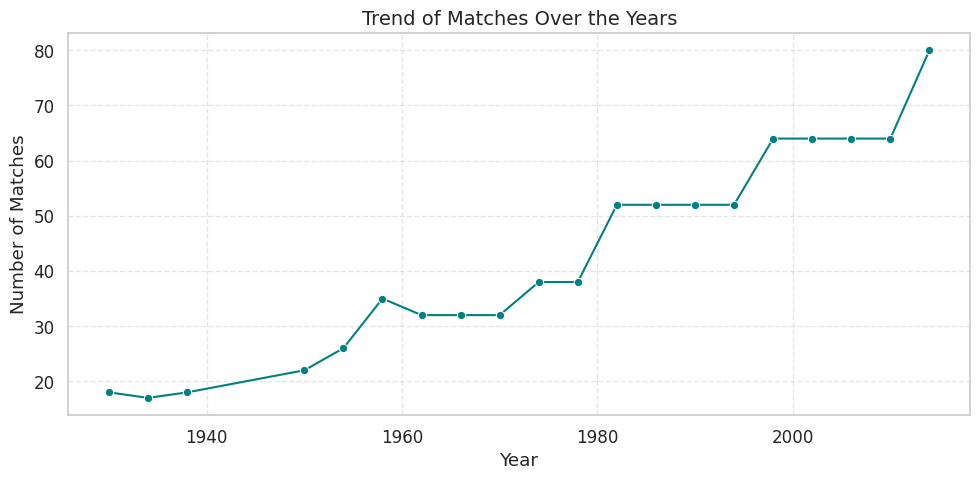

In [123]:
matches_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=matches_per_year.index, y=matches_per_year.values, marker='o', color='teal')
plt.title('Trend of Matches Over the Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


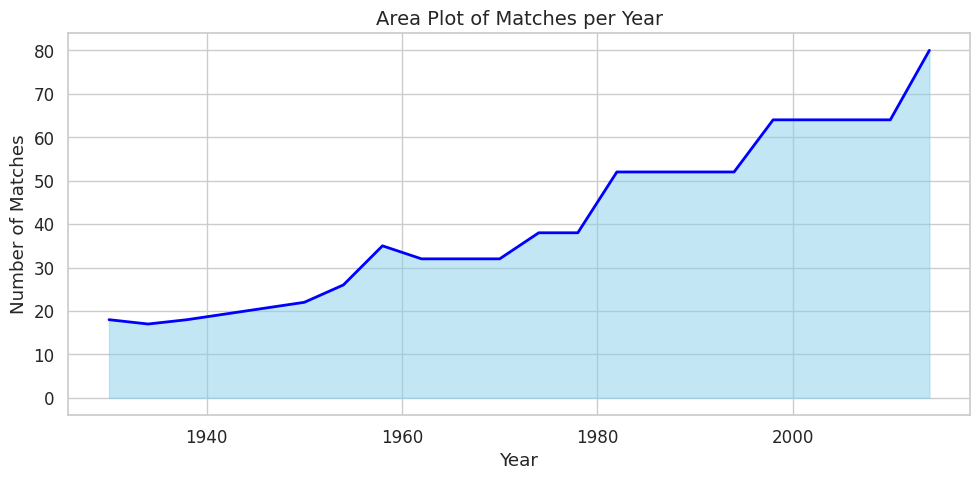

In [124]:
matches_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.fill_between(matches_per_year.index, matches_per_year.values, color='skyblue', alpha=0.5)
plt.plot(matches_per_year.index, matches_per_year.values, color='blue', linewidth=2)
plt.title('Area Plot of Matches per Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()


In [125]:

df.columns

Index(['Year', 'Date', 'Time', 'Round', 'Stadium', 'City', 'Country',
       'HomeTeam', 'HomeGoals', 'AwayGoals', 'AwayTeam', 'Observation'],
      dtype='object')

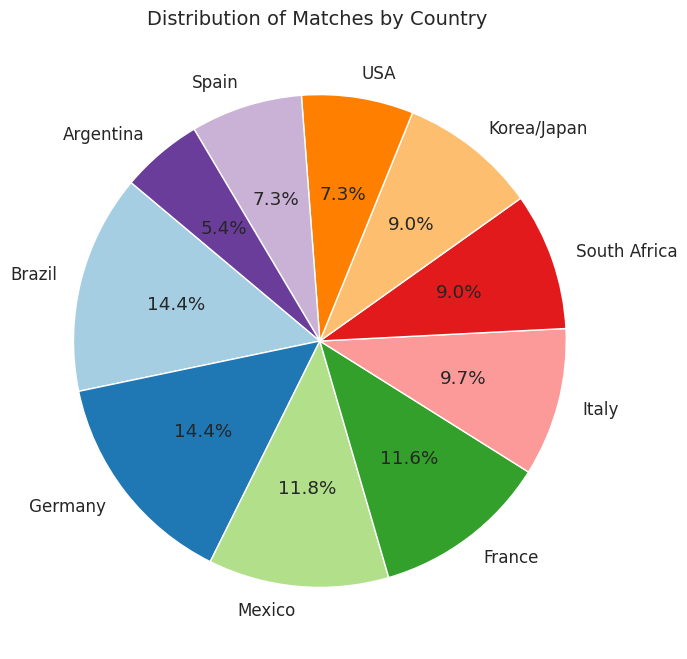

In [126]:
import matplotlib.pyplot as plt

country_counts = df['Country'].value_counts().head(10)

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Matches by Country ', fontsize=14)
plt.show()


/tmp/ipython-input-3546171718.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




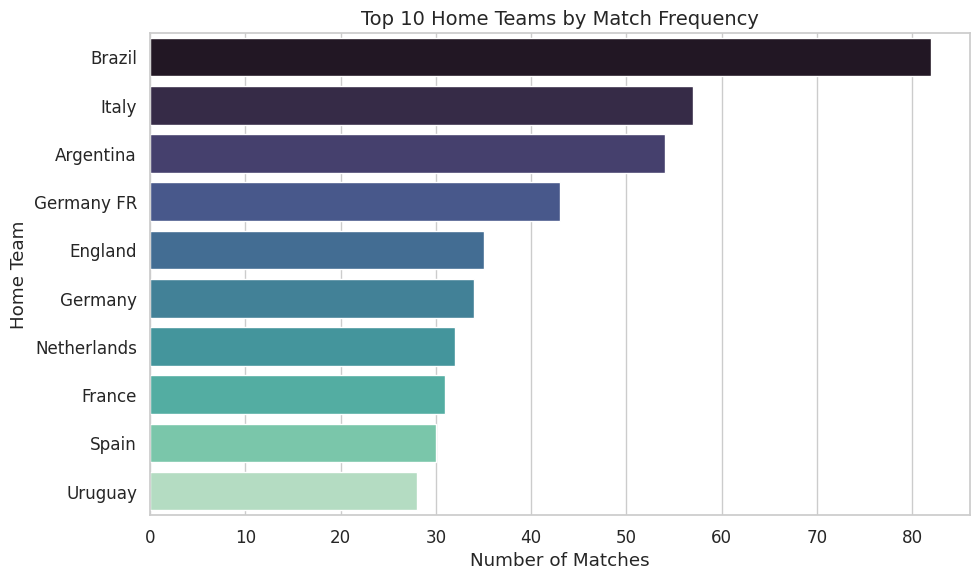

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(y='HomeTeam', data=df, order=df['HomeTeam'].value_counts().index[:10], palette='mako')
plt.title('Top 10 Home Teams by Match Frequency', fontsize=14)
plt.xlabel('Number of Matches')
plt.ylabel('Home Team')
plt.tight_layout()
plt.show()


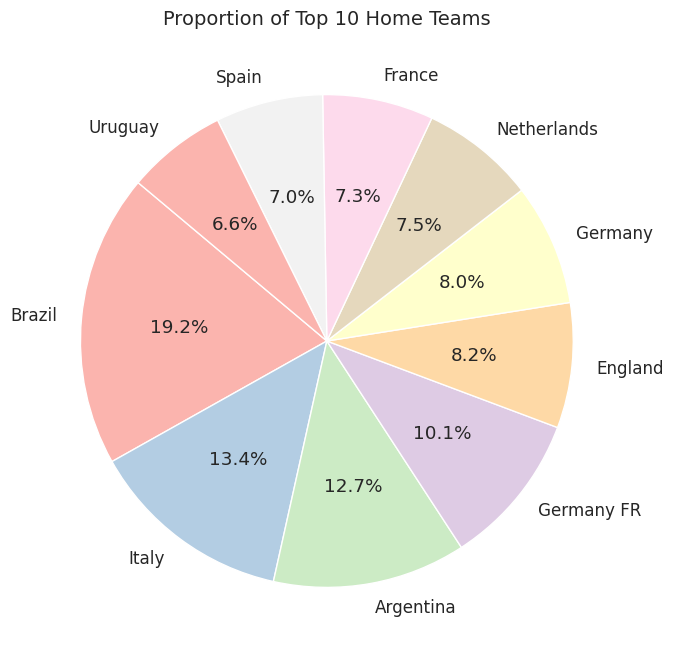

In [128]:
home_counts = df['HomeTeam'].value_counts().head(10)

plt.figure(figsize=(8,8))
plt.pie(home_counts, labels=home_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Proportion of Top 10 Home Teams', fontsize=14)
plt.show()


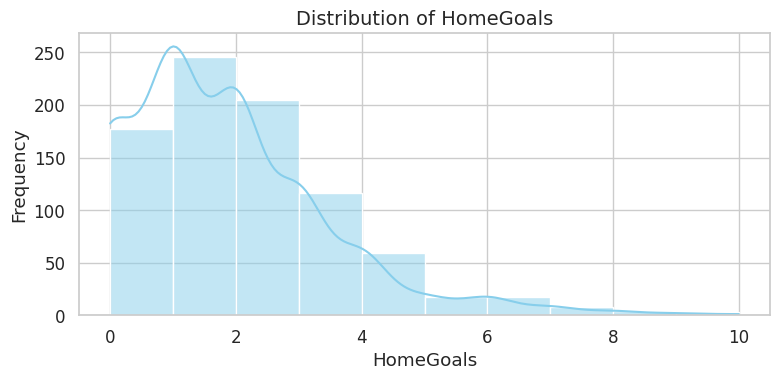

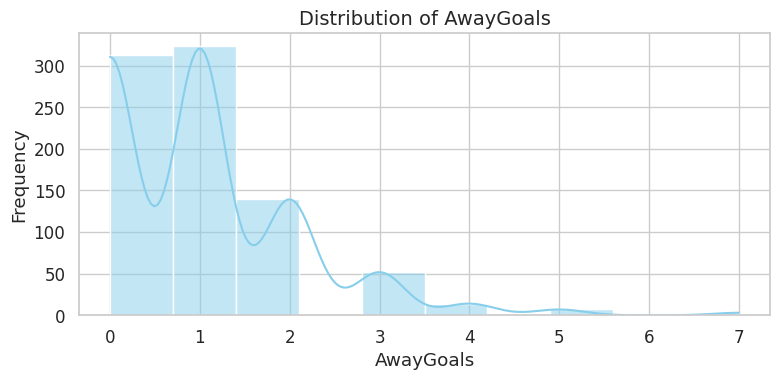

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['HomeGoals', 'AwayGoals']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, color='skyblue', bins=10)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


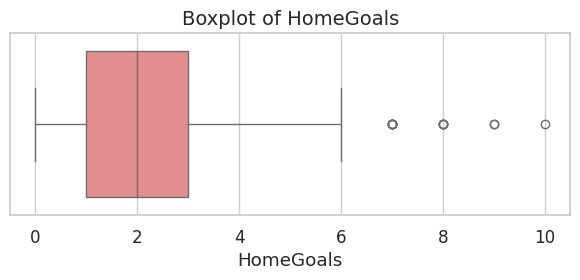

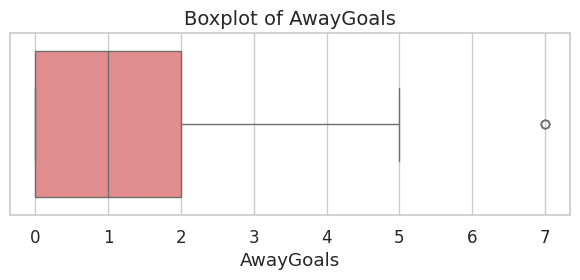

In [130]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [131]:
df.columns

Index(['Year', 'Date', 'Time', 'Round', 'Stadium', 'City', 'Country',
       'HomeTeam', 'HomeGoals', 'AwayGoals', 'AwayTeam', 'Observation'],
      dtype='object')

**Bi-Variatr Analysis**

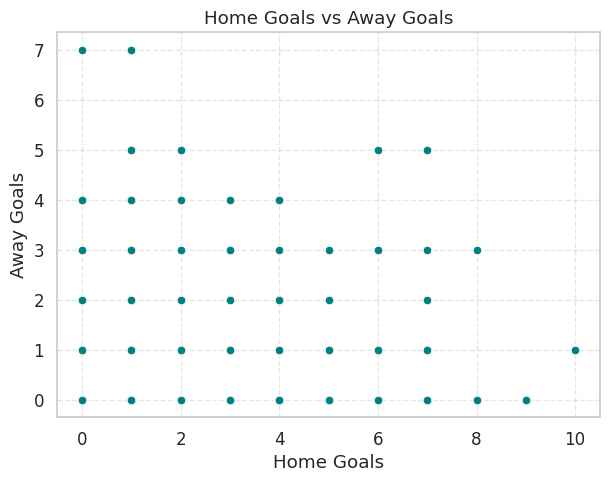

In [132]:



plt.figure(figsize=(7,5))
sns.scatterplot(x='HomeGoals', y='AwayGoals', data=df, color='teal')
plt.title('Home Goals vs Away Goals')
plt.xlabel('Home Goals')
plt.ylabel('Away Goals')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


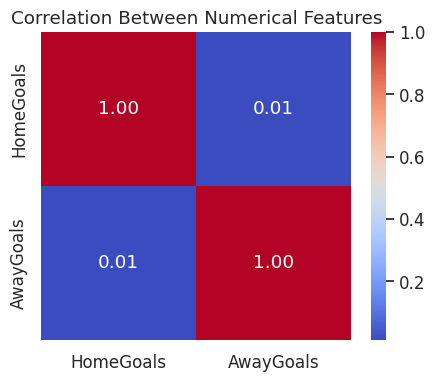

In [133]:
num_cols = ['HomeGoals', 'AwayGoals']

plt.figure(figsize=(5,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numerical Features')
plt.show()


/tmp/ipython-input-3678274643.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




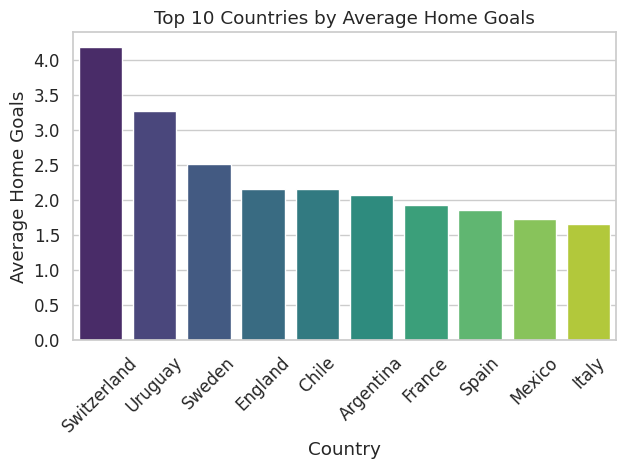

In [163]:
avg_home_goals = df.groupby('Country')['HomeGoals'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(7,4))
sns.barplot(x=avg_home_goals.index, y=avg_home_goals.values, palette='viridis')
plt.title('Top 10 Countries by Average Home Goals')
plt.xlabel('Country')
plt.ylabel('Average Home Goals')
plt.xticks(rotation=45)
plt.show()


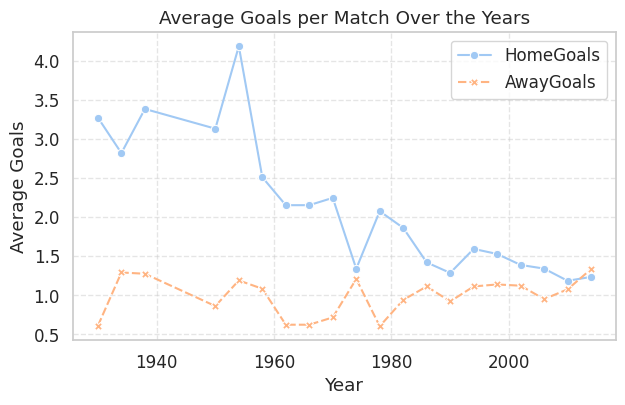

In [166]:
avg_goals_year = df.groupby('Year')[['HomeGoals', 'AwayGoals']].mean()

plt.figure(figsize=(7,4))
sns.lineplot(data=avg_goals_year, markers=True)
plt.title('Average Goals per Match Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Goals')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


/tmp/ipython-input-3925344096.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




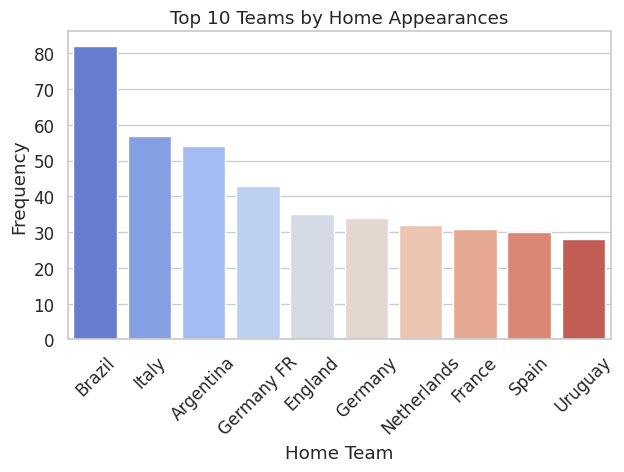

In [167]:
top_teams = df['HomeTeam'].value_counts().head(10)

plt.figure(figsize=(7,4))
sns.barplot(x=top_teams.index, y=top_teams.values, palette='coolwarm')
plt.title('Top 10 Teams by Home Appearances')
plt.xlabel('Home Team')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


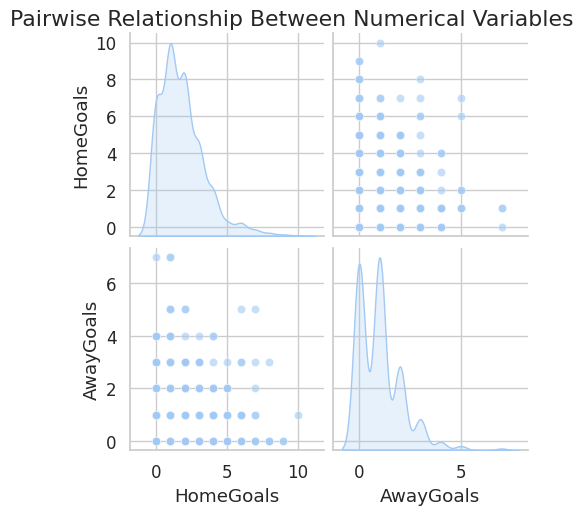

In [137]:
sns.pairplot(df[['HomeGoals', 'AwayGoals']], diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pairwise Relationship Between Numerical Variables', y=1.02)
plt.show()


***Multi-Variate Analysis***

In [138]:
df.columns

Index(['Year', 'Date', 'Time', 'Round', 'Stadium', 'City', 'Country',
       'HomeTeam', 'HomeGoals', 'AwayGoals', 'AwayTeam', 'Observation'],
      dtype='object')

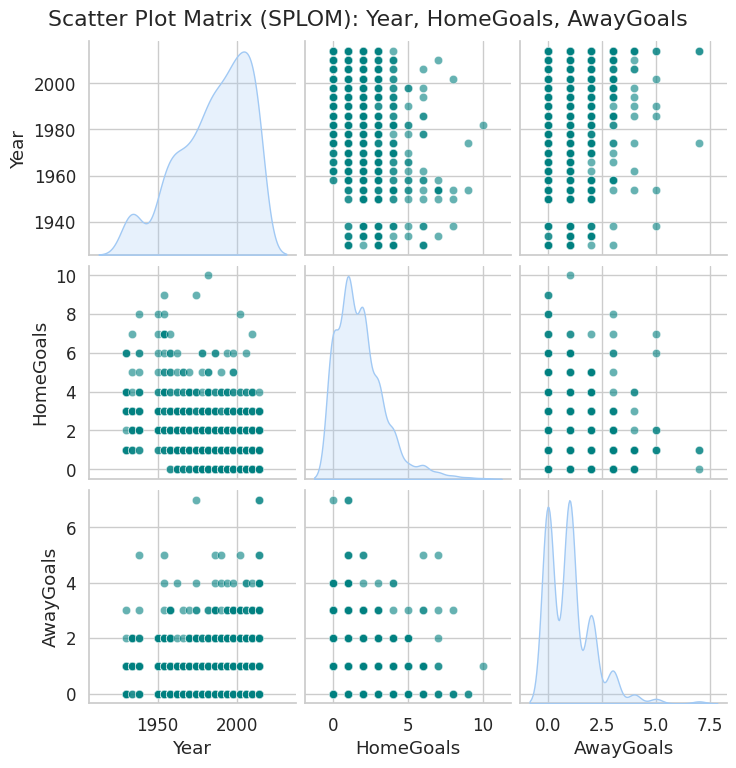

In [170]:



num_cols = ['Year', 'HomeGoals', 'AwayGoals']

sns.pairplot(df[num_cols], diag_kind='kde', plot_kws={'alpha':0.6, 'color':'teal'})
plt.suptitle('Scatter Plot Matrix (SPLOM): Year, HomeGoals, AwayGoals', y=1.02)
plt.show()


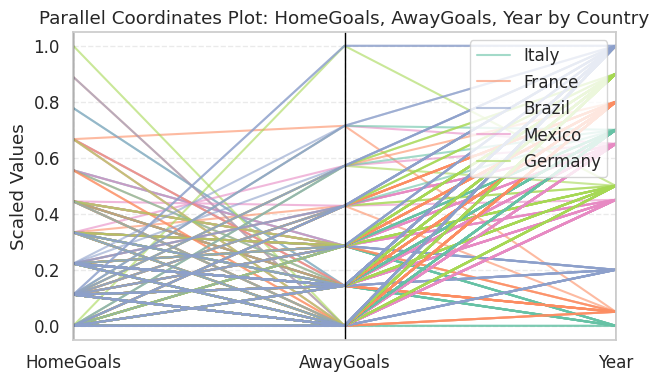

In [171]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns

# Select subset for visualization
subset = df[['Country', 'HomeGoals', 'AwayGoals', 'Year']].dropna()
subset = subset[subset['Country'].isin(df['Country'].value_counts().head(5).index)]  # Top 5 countries
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
subset[['HomeGoals', 'AwayGoals', 'Year']] = scaler.fit_transform(subset[['HomeGoals', 'AwayGoals', 'Year']])


plt.figure(figsize=(7,4))
parallel_coordinates(subset, 'Country', color=sns.color_palette('Set2', 5), alpha=0.6)
plt.title('Parallel Coordinates Plot: HomeGoals, AwayGoals, Year by Country')
plt.ylabel('Scaled Values')
plt.grid(True, linestyle='--', alpha=0.4)



plt.show()


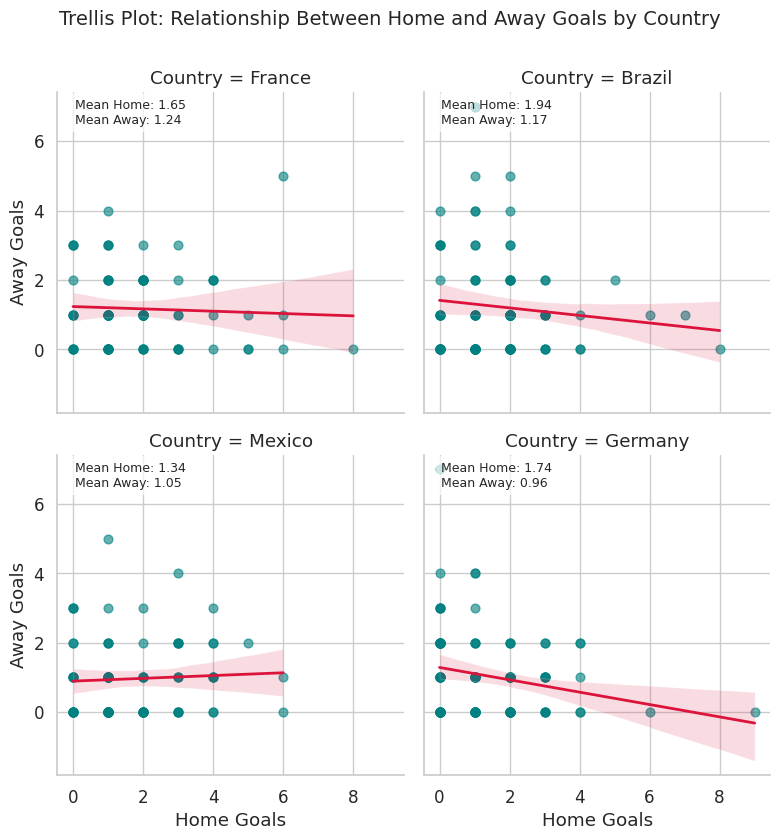

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df already exists with columns: Country, HomeGoals, AwayGoals, MatchOutcome (optional)

# Select top 4 countries
top_countries = df['Country'].value_counts().head(4).index
subset = df[df['Country'].isin(top_countries)]


sns.set_style("whitegrid")
facet = sns.FacetGrid(subset, col='Country', col_wrap=2, height=4)


facet.map_dataframe(
    sns.regplot,
    x='HomeGoals', y='AwayGoals',
    scatter_kws={'color': 'teal', 'alpha': 0.6, 's': 40},
    line_kws={'color': 'crimson', 'lw': 2}
)


facet.set_axis_labels("Home Goals", "Away Goals")
facet.set_titles("Country = {col_name}")


facet.fig.suptitle("Trellis Plot: Relationship Between Home and Away Goals by Country", fontsize=14, y=1.05)


means = subset.groupby('Country')[['HomeGoals', 'AwayGoals']].mean().round(2)
for ax, country in zip(facet.axes.flat, means.index):
    text = f"Mean Home: {means.loc[country, 'HomeGoals']}\nMean Away: {means.loc[country, 'AwayGoals']}"
    ax.text(0.05, 0.9, text, transform=ax.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))


facet.savefig("trellis_plot_improved.png", dpi=300, bbox_inches='tight')
plt.show()


In [142]:
df.columns

Index(['Year', 'Date', 'Time', 'Round', 'Stadium', 'City', 'Country',
       'HomeTeam', 'HomeGoals', 'AwayGoals', 'AwayTeam', 'Observation'],
      dtype='object')

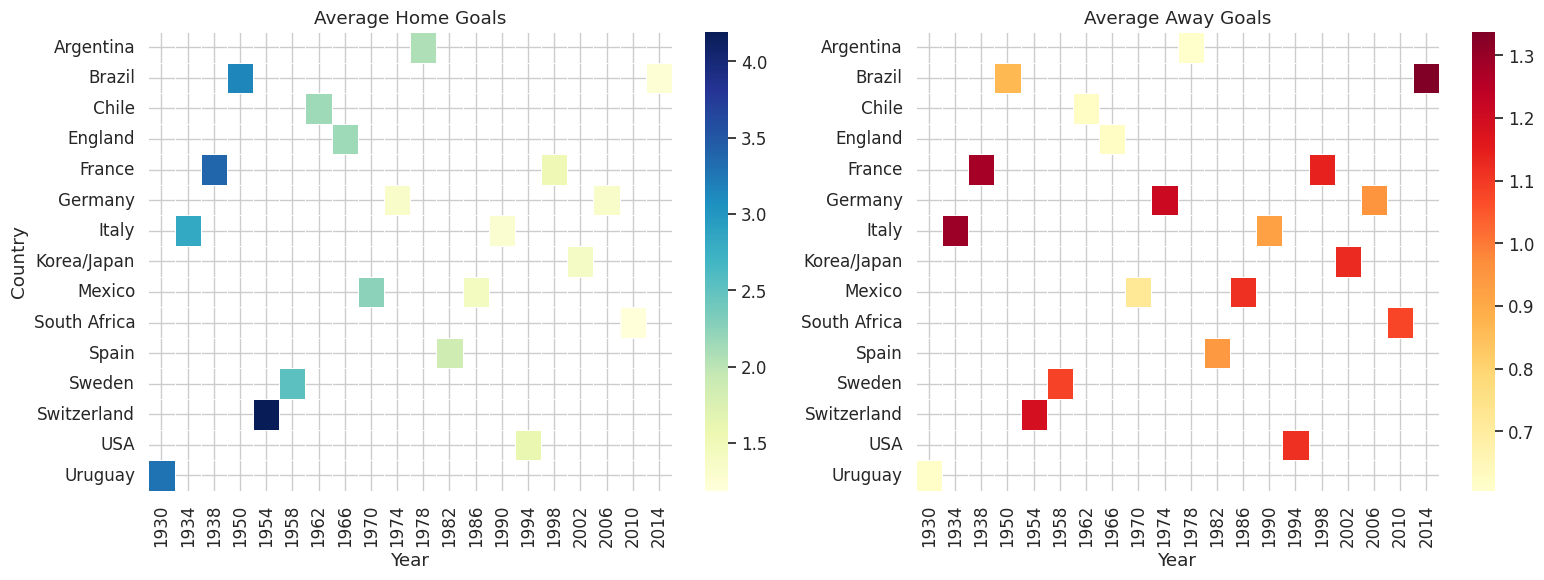

In [143]:



pivot_home = df.pivot_table(values='HomeGoals', index='Country', columns='Year', aggfunc='mean')
pivot_away = df.pivot_table(values='AwayGoals', index='Country', columns='Year', aggfunc='mean')


home_counts = df.groupby('Country')['HomeGoals'].count()
active_countries = home_counts[home_counts > 3].index  # only those with more than 3 years


pivot_home = pivot_home.loc[pivot_home.index.isin(active_countries)]
pivot_away = pivot_away.loc[pivot_away.index.isin(active_countries)]


fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(pivot_home, cmap='YlGnBu', linewidths=0.5, ax=ax[0])
ax[0].set_title('Average Home Goals')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Country')

sns.heatmap(pivot_away, cmap='YlOrRd', linewidths=0.5, ax=ax[1])
ax[1].set_title('Average Away Goals')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('')

plt.tight_layout()
plt.savefig("home_away_heatmaps.png", dpi=300, bbox_inches='tight')
plt.show()


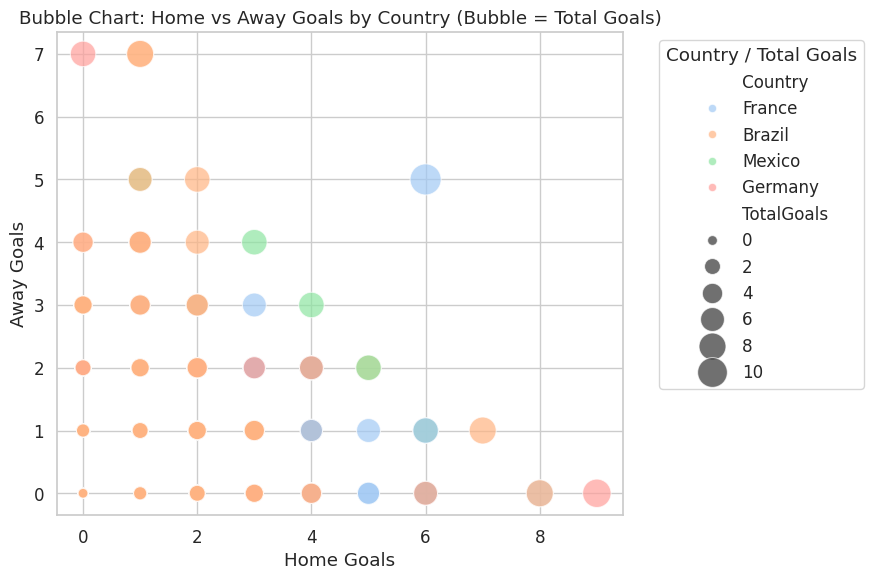

In [144]:

df['TotalGoals'] = df['HomeGoals'] + df['AwayGoals']


top_countries = df['Country'].value_counts().head(4).index
subset = df[df['Country'].isin(top_countries)]


plt.figure(figsize=(9,6))
sns.scatterplot(
    x='HomeGoals',
    y='AwayGoals',
    size='TotalGoals',
    hue='Country',
    data=subset,
    alpha=0.7,
    sizes=(50, 500)
)

plt.title('Bubble Chart: Home vs Away Goals by Country (Bubble = Total Goals)')
plt.xlabel('Home Goals')
plt.ylabel('Away Goals')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country / Total Goals')

plt.tight_layout()
plt.savefig("improved_bubble_chart.png", dpi=300, bbox_inches='tight')
plt.show()



***Network of Football matches****

In [149]:
df.columns


Index(['Year', 'Date', 'Time', 'Round', 'Stadium', 'City', 'Country',
       'HomeTeam', 'HomeGoals', 'AwayGoals', 'AwayTeam', 'Observation'],
      dtype='object')

In [172]:

import networkx as nx


df_2014 = df[df['Year'] == 2014].copy()


G = nx.DiGraph()


for _, row in df_2014.iterrows():
    home = row['HomeTeam']
    away = row['AwayTeam']
    home_goals = row['HomeGoals']
    away_goals = row['AwayGoals']



    G.add_node(home)
    G.add_node(away)


    G.add_edge(home, away, home_goals=home_goals, away_goals=away_goals,
               result=f"{home_goals}-{away_goals}")


pos = nx.spring_layout(G, k=1, iterations=50)


edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines'
)

node_x = []
node_y = []
node_text = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    textposition="bottom center",
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=20,
        color=[G.degree(node) for node in G.nodes()],
        colorbar=dict(title="Number of Matches")
    )
)


fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='2014 FIFA World Cup - Match Network',
                    title_x=0.5,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40)
                ))

# Show figure
fig.show()


***Data INK Ratio***

In [159]:

# Import necessary libraries
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Load the three visualization images
img1 = Image.open('/content/obj_2-Energy (1).png')
img2 = Image.open('/content/obj_2-WebTraffic (1).png')
img3 = Image.open('/content/obj_2-Sales (1).png')




In [173]:
from PIL import Image
import numpy as np

# Attached images (rename if your filenames differ)
files = [
    '/content/obj_2-Sales (1).png',  # Monthly sales (grouped bars)
    '/content/obj_2-Energy (1).png',  # 3D traffic sources
    '/content/obj_2-Energy (1).png'     # Renewable energy lines
]

def otsu_threshold(arr):
    hist, _ = np.histogram(arr.flatten(), bins=256, range=(0,256))
    total = arr.size
    sum_total = np.dot(np.arange(256), hist)
    sumB = 0
    wB = 0
    varMax = 0
    threshold = 0
    for t in range(256):
        wB += hist[t]
        if wB == 0:
            continue
        wF = total - wB
        if wF == 0:
            break
        sumB += t * hist[t]
        mB = sumB / wB
        mF = (sum_total - sumB) / wF
        varBetween = wB * wF * (mB - mF) ** 2
        if varBetween > varMax:
            varMax = varBetween
            threshold = t
    return threshold

print('file,total_pixels,ink_pixels,data_ink_pixels,data_ink_ratio')

for f in files:
    img = Image.open(f).convert('L')
    arr = np.array(img)


    thr = otsu_threshold(arr)
    binary = (arr < thr).astype(np.uint8)


    ink_pixels = int(binary.sum())


    rows = binary.sum(axis=1)
    cols = binary.sum(axis=0)
    rth = rows.mean() * 0.2
    cth = cols.mean() * 0.2
    top = int(np.argmax(rows > rth))
    bottom = int(len(rows) - np.argmax(rows[::-1] > rth) - 1)
    left = int(np.argmax(cols > cth))
    right = int(len(cols) - np.argmax(cols[::-1] > cth) - 1)
    plot = binary[top:bottom, left:right]

    data_ink_pixels = int(plot.sum())
    ratio = data_ink_pixels / ink_pixels if ink_pixels else 0.0

    print(f'{f},{arr.size},{ink_pixels},{data_ink_pixels},{ratio:.4f}')

file,total_pixels,ink_pixels,data_ink_pixels,data_ink_ratio
/content/obj_2-Sales (1).png,640926,162402,161315,0.9933
/content/obj_2-Energy (1).png,640926,56559,55960,0.9894
/content/obj_2-Energy (1).png,640926,56559,55960,0.9894
